# Lecture DFT 2
---

- [The Fast Fourier-Transform (FFT)](#The-Fast-Fourier-Transform-(FFT))
- [fft and fftshift in python](#fft-and-fftshift-in-python)
- [Aliasing](#Aliasing)

This lecture will first introduce the **Fast Fourier Transform (FFT)** and its application in Python. In a second step we will talk about what happens, when the Nyquist condition (i.e. $f_{\mathrm{max}}<2f_s$) is violated, wich leads to so called **aliasing** effects.

### The Fast Fourier-Transform (FFT)
---

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('K9WOuEaO01k', width=380, height=220)

> We remind ourselfs: Given a signal $\vec{f} = \begin{pmatrix}f_0,f_1,\ldots,f_{n-1} \end{pmatrix}$ we can find the Fourier coefficients $c_n$ via
$$
c_n = \sum_{k=0}^{N-1}f_k e^{-i\frac{2\pi}{N}nk}\qquad \mathrm{or}\quad
\vec{c} = \mathbf{W}\vec{f}
$$
with $W_{nk} = e^{-i\frac{2\pi}{N}nk}$. 

This will need $N^2$ complex operations (multiplications), which is computationally very slow even for moderate values of $N$. 

The so called **Fast Fourier Transform (FFT)** uses certain symmetries
to recuce the numerical complexity of the problem. From now on we take $N$ to be of the form $N=2^{\nu}$, i.e. $N=2,4,8,16,32,64,128,256,512,1024,\ldots$. 

We split the DFT into even and odd parts of the signal vector $\vec{f}= \begin{pmatrix}f_0,f_1,\ldots,f_{n-1} \end{pmatrix}$:
$$
c_n = \sum_{k=0}^{N-1}f_k e^{-i\frac{2\pi}{N}nk} = 
\sum_{k=0}^{\frac{N}{2}-1}f_{2k} e^{-i\frac{2\pi}{N}(2k)n}  + 
\sum_{k=0}^{\frac{N}{2}-1}f_{2k+1} e^{-i\frac{2\pi}{N}(2k+1)n}   \\
= \sum_{k=0}^{\frac{N}{2}-1}f_{2k} e^{-i\frac{2\pi}{\frac{N}{2}}nk} + 
e^{-i\frac{2\pi}{N}n}\sum_{k=0}^{\frac{N}{2}-1}f_{2k+1} e^{-i\frac{2\pi}{\frac{N}{2}}nk}\\
= \sum_{k=0}^{\frac{N}{2}-1}f_{2k} \, w_{\frac{N}{2}}^{nk} + 
w_N^n \sum_{k=0}^{\frac{N}{2}-1}f_{2k+1}\,  w_{\frac{N}{2}}^{nk}\\ 
= c_n^e + w_N^n c_n^o 
$$
where we defined $w_N = e^{-i\frac{2\pi}{N}}$ and use the superscripts $e$ for even and $o$ for odd.

If we look more closely at the above equation, we find that $c_n^e$ and $c_n^o$ are $N/2$-DFTs.
Important (and the essential step of the FFT) is the periodicity
$$
c_n^e = c_{n+\frac{N}{2}}^e \\
c_n^o = c_{n+\frac{N}{2}}^o 
$$
Furthermore we have
$$
w_N^{n+\frac{N}{2}} = -w_N^n 
$$
and hence
$$
c_n = c_n^e + w_N^n c_n^o  \quad n = 0,1,\ldots,N/2-1\\
c_{n+N/2} = c_n^e - w_N^n c_n^o  \quad n = 0,1,\ldots,N/2-1 
$$
We conclude that we only have to calculate the first $N/2$ partial transformations.

For each of this partial operations we need $(N/2)^2$ numerical operations. In total, this will lead to $2(N/2)^2$ operationens for both $(N/2)$-DFTs. Additionally we have $N$ operations for the multiplication with
$w_k^N$, i.e.
$$
2\left(\frac{N}{2}\right)^2 + N\,.
$$
We can now continue this procedure, i.e. decompose each $(N/2)$-DFT in an even and odd $(N/4)$-DFT,
which will need
$$
2\left(\frac{N}{4}\right)^2 + \frac{N}{2}
$$
numerical operations. In total, after the second step we need 
$$
2\left(2\left(\frac{N}{4}\right)^2 + \frac{N}{2}\right) + N = 4\left(\frac{N}{4}\right)^2 + N + N\,.
$$
numerical operations. We proceed by decomposing the $(N/4)$-DFTs into two $(N/8)$-Punkte DFTs with computational complexity
$$
2\left(\frac{N}{8}\right)^2 + \frac{N}{4}\,.
$$
Hence the total computational complexity after the third step is
$$
4\left(2\left(\frac{N}{8}\right)^2 + \frac{N}{4}\right) + N + N = 8\left(\frac{N}{8}\right)^2 + N + N + N\,.
$$
For $N=2^{\nu}$ there are exactly $\nu$ of these decomposition steps. Hence, the computational complexity is given by
$$
(\nu+1)N \propto N\log_2(N)
$$
For example, if $v=10$ (i.e $N=1024$) we can save $99\%$ of the computational complexity.

The sequential approach described above is illustrated in so-called FFT-butterflies, as shown in the figure below. 
In computer science, the FFT-algorithm belongs to the class of divide-and-conquer algorithms (they works by recursively breaking down a problem into two or more sub-problems of the same or related type).

<img src="fft_butterfly.png" height="100" width="400"/>

### fft and fftshift in python
---

This section will introduce the Python/Numpy-library fft and you will learn how to use the commands fft and fftshift. We will also explain, how we set the frequency axis.

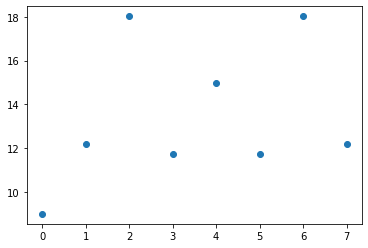

In [15]:
from numpy.fft import fft, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt
fs, T = 4, 2
f = np.array([0,-1,2,3,-10,4,5,6])
c = fft(f)
plt.plot(np.abs(c),'o')
plt.show()


array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5])

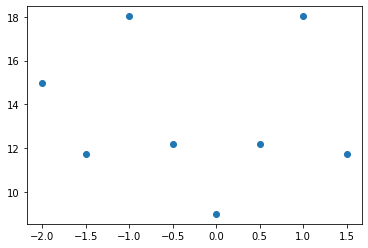

In [16]:
c = fftshift(c)
fn= np.arange(-fs/2,fs/2,1/T)
plt.plot(fn,np.abs(c),'o')
fn

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift, ifft, ifftshift

from scipy.io.wavfile import write, read
from IPython.display import Audio
import librosa

/opt/tljh/user/lib/python3.6/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


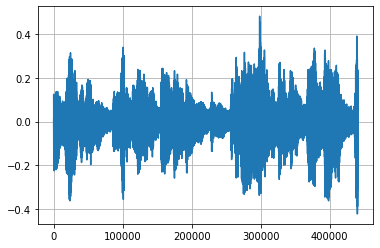

In [25]:
s,fs = librosa.load('LIB.mp3',44100)
plt.plot(s[20*44100:20*44100+10*44100])
plt.grid()

In [15]:
f1 = s[20*44100:20*44100+10*44100]
write('tmp1.wav',44100,f1.astype('float32'))
Audio('tmp1.wav')

In [4]:
f1.size

441000

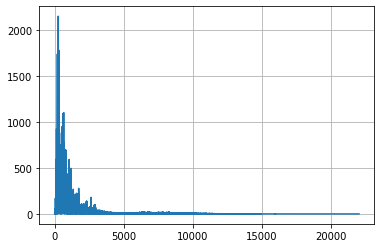

In [21]:
T = 10
fs = 44100
c = fftshift(fft(f1))
fn = np.arange(-fs/2,fs/2,1/T)
plt.plot(fn[fn>0],np.abs(c[fn>0]))
plt.grid()

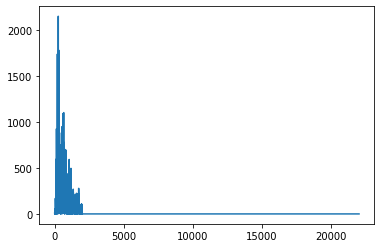

In [26]:
c[np.abs(np.abs(fn)>2000)] = 0
plt.plot(fn[fn>0],(abs(c[fn>0])))
f2 = ifft(ifftshift(c))# Fourier-Synthese

In [27]:
write('tmp2.wav',np.int(41100),f2.astype('float32'))
Audio('tmp2.wav')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


### Aliasing
---

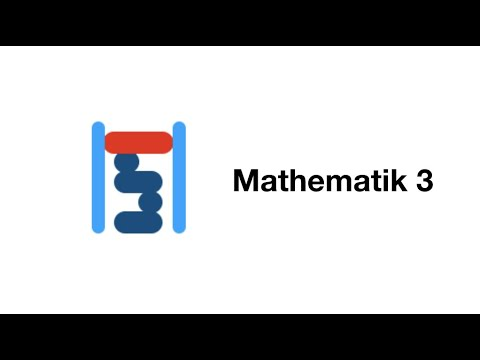

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('zeQfc7QBKSk', width=380, height=220)

If the Nyquist condition
$$
f_s\geq 2f_{\mathrm{max}}
$$
where $f_{\mathrm{max}}$ the maximum frequency of the (continuous) input signal is violated we suffer from
having so called **aliasing**. That means, that the DFT predicts wrong frequencies. 
The corresponding aliasing frequencies $f_{\mathrm{alias}} $ occur at the frequencies
$$
f_{\mathrm{alias}} = \min_{n}\left|nf_s-f_{\mathrm{signal}}\right|\,.
$$
Here $f_{\mathrm{signal}}$ denotes any frequency of the input signal, for which the Nyquist–Shannon sampling theorem is violated (These can also be multiple frequencies, for each of which there is an aliasing freuqency). 

To make it more concrete: Suppose we have a signal of the form
$$
f(t)=\cos(2\pi f_{\mathrm{signal}}t)
$$
Sampling this signal with sampling frequency $f_s$ over a period $T$, we obtain the discrete times $t_k = \frac{T}{N}k = \frac{1}{f_{s}}k$ together with
$$
f_k = f(t_k) = \cos\left(2\pi \frac{ f_{\mathrm{signal}}}{f_{\mathrm{s}}} k \right) \,.
$$
The real part of the base functions takes the form
$$
b_k =  \cos\left(2\pi (\frac{1}{T}n) \frac{T}{N}k \right)   = \cos(2\pi\frac{f_n}{f_s}k)\,.
$$
Both $b_k$ and $f_k$ are equal if
$$
 f_{\mathrm{signal}} = f_n+nf_s
$$
or
$$
f_n =  f_{\mathrm{signal}}-n f_s\,.
$$
> Hence the aliasing frequencies occur at the lowest (absolute) value for $f_n$, i.e.
$$
\min_n|n f_s-f_{\mathrm{signal}}| = f_{\mathrm{alias}}
$$


25

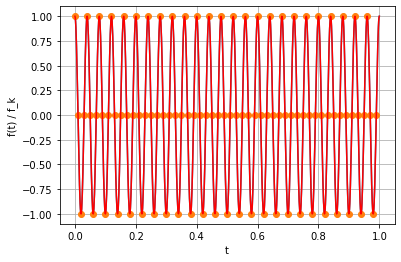

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
f_signal = 25
f_s =100

t = np.linspace(0,T,1000)
signal = np.cos(2*np.pi*f_signal*t)
t_sampled = np.arange(0,T,1/f_s)
signal_sampled =  np.cos(2*np.pi*f_signal*t_sampled)

plt.plot(t,signal)
plt.plot(t_sampled,signal_sampled,'o')

f_alias = np.min(np.abs(np.arange(0,10,1)*f_s-f_signal))
plt.plot(t,np.cos(2*np.pi*f_alias*t),'r')
plt.grid()
plt.xlabel('t')
plt.ylabel('f(t) / f_k')
f_alias

### Animation des YouTube-Videos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T   = 1
f_s = 300
n   = 10

t = np.arange(0,T,1/f_s)
f = np.cos(2*np.pi/T*n*t) + 0.4*np.random.rand(t.size)
plt.plot(t,f)

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
t.shape

In [ ]:
from numpy.fft import fft, fftshift, ifft, ifftshift

c = fftshift(fft(f))
freq = np.arange(-f_s/2,f_s/2,1/T)

plt.plot(freq,abs(c))
plt.xlabel('f_n')
plt.ylabel('|c_n|')
plt.grid()

In [ ]:
c[np.abs(c)<20] = 0

plt.plot(freq,abs(c))
plt.xlabel('f_n')
plt.ylabel('|c_n|')
plt.grid()

In [ ]:
f = ifft(ifftshift(c))
plt.plot(t,f)

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
t.shape